In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'C:\Users\TrimbakeshwarSavalgi\Desktop\Git Capstone\bajaj_finserv_capstone\Daily_work\New DataSet\Cleaned Data\BajajDataset_Cleaned_left.csv')
data.head()

InvoiceDate    DealerState Segment  Enquiry_flag  Booking_flag  \
0     00:00.0        Haryana      M1             1             1   
1     00:00.0  Uttar Pradesh      M3             1             1   
2     00:00.0  Uttar Pradesh      M1             1             1   
3     00:00.0  Uttar Pradesh      M1             1             1   
4     00:00.0  Uttar Pradesh      M1             1             1   

     PAYMENT_TYPE   CustomerCode           InvoiceNo  LoanTaken    LeadType  \
0  Loan not taken  CUS-272013139  ASDA272011800034_1          0  No Enquiry   
1  Loan not taken  CUS-274651284  ASDA274651800055_1          0  No Enquiry   
2  Loan not taken   CUS-28970748  ASDA289701800008_1          0  No Enquiry   
3  Loan not taken  CUS-295861155  ASDA295861800014_1          0  No Enquiry   
4  Loan not taken    CUS-6568346  ASDA656831800022_1          0  No Enquiry   

  TestRideOffered    FollowUp SourceOfEnquiry FollowUpDone BranchType  \
0      No Enquiry  No Enquiry      No Enquiry   No Enquiry      Urban   
1      No Enquiry  No Enquiry      No Enquiry   No Enquiry      Urban   
2      No Enquiry  No Enquiry      No Enquiry   No Enquiry      Urban   
3      No Enquiry  No Enquiry      No Enquiry   No Enquiry      Urban   
4      No Enquiry  No Enquiry      No Enquiry   No Enquiry      Urban   

   TotalAmount       City          State     DealerCity ModelFamily  
0      38081.0    Gurgaon        HARYANA     DHUNDAHERA    Splendor  
1      64326.0  Allahabad  UTTAR PRADESH         SORAON         CBZ  
2      38081.0  Allahabad  UTTAR PRADESH   Hanuman Ganj    Splendor  
3      38081.0  Allahabad  UTTAR PRADESH  Bharwari (NP)    Splendor  
4      46481.0  Allahabad  UTTAR PRADESH   MIYA KA PURA   Star city

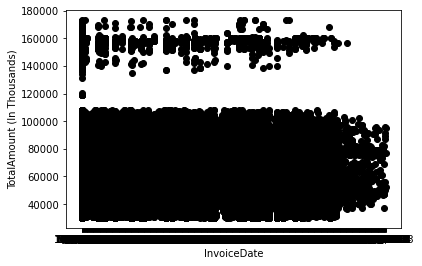

In [13]:
X = data[["TotalAmount","InvoiceDate"]]
#Visualise data points
plt.scatter(X["InvoiceDate"],X["TotalAmount"],c='black')
plt.xlabel('InvoiceDate')
plt.ylabel('TotalAmount (In Thousands)')
plt.show()

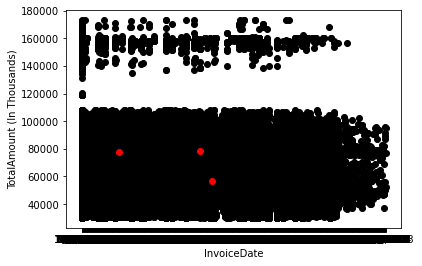

In [9]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["InvoiceDate"],X["TotalAmount"],c='black')
plt.scatter(Centroids["InvoiceDate"],Centroids["TotalAmount"],c='red')
plt.xlabel('InvoiceDate')
plt.ylabel('TotalAmount (In Thousands)')
plt.show()

In [10]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["InvoiceDate"]-row_d["InvoiceDate"])**2
            d2=(row_c["TotalAmount"]-row_d["TotalAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["TotalAmount","InvoiceDate"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['TotalAmount'] - Centroids['TotalAmount']).sum() + (Centroids_new['InvoiceDate'] - Centroids['InvoiceDate']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["TotalAmount","InvoiceDate"]]

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [11]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["InvoiceDate"],data["TotalAmount"],c=color[k])
plt.scatter(Centroids["InvoiceDate"],Centroids["TotalAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('TotalAmount(In Thousands)')
plt.show()

KeyError: 'Cluster'